In [2]:
# Loading and parsing data

# PLOT - parse data + std-dev
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats

sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

# read hot RDMA
dfs = []
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    data = pd.read_csv(os.path.join('hot_libfabric', f'{size}.csv'), skiprows=50, usecols=[1], names=["time"])
    data['size'] = size
    data['time'] *= 2/1000
    dfs.append(data)
data_perftest = pd.concat(dfs, axis=0)
data_perftest['type'] = 'perftest'

# read warm RDMA
dfs = []
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    data = pd.read_csv(os.path.join('warm_libfabric', f'{size}.csv'), skiprows=50, usecols=[1], names=["time"])
    data['size'] = size
    data['time'] *= 2/1000
    dfs.append(data)
data_perftest_warm = pd.concat(dfs, axis=0)
data_perftest_warm['type'] = 'perftest_warm'

# read serverless hot
dfs = []
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    data = pd.read_csv(os.path.join('hot', f'{size}.csv'))
    data.set_index('id', drop=True, inplace=True)
    data['size'] = size
    data['time'] /= 1000.0
    dfs.append(data)
data_serverless = pd.concat(dfs, axis=0)
data_serverless['type'] = 'serverless_hot'

# read serverless warm
dfs = []
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    data = pd.read_csv(os.path.join('warm', f'{size}.csv'))
    data.set_index('id', drop=True, inplace=True)
    data['size'] = size
    data['time'] /= 1000.0
    dfs.append(data)
data_serverless_warm = pd.concat(dfs, axis=0)
data_serverless_warm['type'] = 'serverless_warm'

for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    data_slice = data_serverless.loc[data_serverless['size'] == size, 'time']
    print(f'Serverless hot {size}, p50 {np.percentile(data_slice,50)}, p95 {np.percentile(data_slice,95)}, p99 {np.percentile(data_slice,99)}')
print('-------------------')
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    data_slice = data_serverless_warm.loc[data_serverless_warm['size'] == size,'time']
    print(f'Serverless warm {size}, p50 {np.percentile(data_slice,50)}, p95 {np.percentile(data_slice,95)}, p99 {np.percentile(data_slice,99)}')
print('-------------------')
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    data_slice = data_perftest.loc[data_perftest['size'] == size, 'time']
    print(f'RDMA hot {size}, p50 {np.percentile(data_slice,50)}, p95 {np.percentile(data_slice,95)}, p99 {np.percentile(data_slice,99)}')
print('-------------------')
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    data_slice = data_perftest_warm.loc[data_perftest_warm['size'] == size, 'time']
    print(f'RDMA warm {size}, p50 {np.percentile(data_slice,50)}, p95 {np.percentile(data_slice,95)}, p99 {np.percentile(data_slice,99)}')
print('-------------------')

data = pd.concat([data_perftest, data_perftest_warm, data_serverless, data_serverless_warm], axis=0, ignore_index=True)
faas_median = data[data['type'] == 'serverless_hot'].groupby(['size']).median()
faas_median2 = data[data['type'] == 'serverless_warm'].groupby(['size']).median()
rdma_median = data[data['type'] == 'perftest'].groupby(['size']).median()
rdma_median2 = data[data['type'] == 'perftest_warm'].groupby(['size']).median()
print('RDMA hot median', rdma_median)
diff=(faas_median-rdma_median)['time'].dropna()
print('Difference between FaaS Hot and RDMA hot, ', diff)
print('Avg Difference between FaaS Hot and RDMA, ', diff.mean())
diff2=(faas_median2-rdma_median2)['time'].dropna()
print('Difference between FaaS Warm and RDMA warm, ', diff2)
print('Avg Difference between FaaS Warm and RDMA warm, ', diff2.mean())
print('-------------------')

Serverless hot 1, p50 8.086, p95 9.97, p99 13.801680000000037
Serverless hot 2, p50 8.044, p95 9.76105, p99 22.099800000000037
Serverless hot 4, p50 8.016, p95 9.597099999999998, p99 22.581170000000025
Serverless hot 8, p50 8.076, p95 9.676099999999998, p99 23.530110000000004
Serverless hot 16, p50 8.0655, p95 9.571, p99 22.33404
Serverless hot 32, p50 8.055, p95 9.56305, p99 13.06001
Serverless hot 64, p50 8.132, p95 9.787149999999999, p99 22.76997000000013
Serverless hot 128, p50 8.111, p95 9.298, p99 19.393540000000208
Serverless hot 256, p50 8.04, p95 9.56005, p99 12.817140000000046
Serverless hot 512, p50 8.118, p95 10.116149999999998, p99 12.870680000000014
Serverless hot 1024, p50 8.296, p95 9.479099999999997, p99 20.674510000000012
Serverless hot 2048, p50 8.958, p95 10.192, p99 22.53460000000001
Serverless hot 4096, p50 11.214, p95 12.508, p99 23.24377000000006
-------------------
Serverless warm 1, p50 70.921, p95 116.69164999999995, p99 13547.751420000002
Serverless warm 2, 

In [10]:

data['time'] /= 2

8


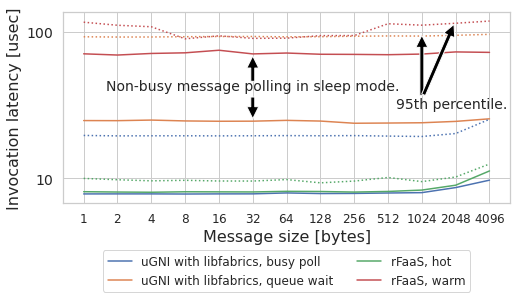

In [30]:
# PLOT - non-parametric CI, but smaller.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
import math

sns.set(rc={'figure.figsize':(8,3.5)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)


ax = plt.gca()


plt = sns.lineplot(x="size", y="time", hue='type', ci=None, estimator=p50_estimator, data=data, ax=ax)
#sns.lineplot(x="size", y="Mean Latency Microseconds",data=ethernet_data, color='red', ax=ax)
#legend_ethernet.append(ax.lines[-1])

sns.lineplot(x="size", y="time", hue='type', ci=None, estimator=p95_estimator, data=data, ax=ax)
# I don't know why but matplotlib has 4 lines here: 2 are plotted, 2 are used as legend labels
#ax.lines[-4].set_linestyle("dotted")
ax.lines[-5].set_linestyle("dotted")
ax.lines[-6].set_linestyle("dotted")
ax.lines[-7].set_linestyle("dotted")
ax.lines[-8].set_linestyle("dotted")

#sns.lineplot(x="size", y="99th Percentile Latency Microseconds", data=ethernet_data, color='red', ax=ax)
#ax.lines[-1].set_linestyle("dotted")
#legend_ethernet.append(ax.lines[-1])

ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
#ax.set_yticks([2, 10, 80])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_xlabel('Message size [bytes]',fontsize=16)
ax.set_ylabel('Invocation latency [usec]',fontsize=16)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)

handles, labels = ax.get_legend_handles_labels()
# I don't know why but matplotlib doesn't import the style for some lines
handles[4].set_linestyle("--")
handles[5].set_linestyle("--")
handles[6].set_linestyle("--")
handles[7].set_linestyle("--")
print(len(handles))

# explain in caption what doted lines are
labels = ["uGNI with libfabrics, busy poll", "uGNI with libfabrics, queue wait", "rFaaS, hot", "rFaaS, warm"]#, "fabtests busy poll, P95", "fabtests, queue wait P95", "rFaaS hot, P95", "rFaaS warm, P95"]
handles = handles[0:4]
#labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, ncol=2, bbox_to_anchor=(0.5, -0.5), loc='lower center', fontsize=12)

ax.annotate("Non-busy message polling in sleep mode.",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(32, 25),  #xycoords='data',
            xytext=(32, 40), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='center'
    #        , verticalalignment='top',
)
ax.annotate("",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(32, 70),  #xycoords='data',
            xytext=(32, 45), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='center'
    #        , verticalalignment='top',
)

ax.annotate("Busy message polling with spinning.",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(32, 5),  #xycoords='data',
            xytext=(32, 15), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='center'
    #        , verticalalignment='top',
)

ax.annotate("95th percentile.",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(600, 30),  #xycoords='data',
            xytext=(600, 30), fontsize=14,
    #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='center'
    #        , verticalalignment='top',
)
ax.annotate("",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(1024, 100),  #xycoords='data',
            xytext=(1024, 35), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='center'
    #        , verticalalignment='top',
)
ax.annotate("",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(2048, 120),  #xycoords='data',
            xytext=(1024, 35), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='center'
    #        , verticalalignment='top',
)
# sizes = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
# low = np.zeros(sizes.shape)
# high = np.zeros(sizes.shape)

# col_palette = sns.color_palette()
# #full_data = pd.concat([data, ethernet_data], axis=0)
# for idx, data_type in enumerate(['perftest', 'serverless_hot', 'serverless_warm']):

#     i = 0
#     data2 = data.loc[(data['type'] == data_type)]
#     for row, group in data2.groupby(['size']):
#         d = np.sort(group['time'])
#         n = len(d)
#         low_pos = int(math.floor( (n - 1.96*math.sqrt(n)) / 2))
#         high_pos = int(math.ceil(1 +  (n + 1.96*math.sqrt(n)) / 2))
#         print(f'{data_type}, {row}, Non-param 95, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
#         low_pos = int(math.floor( (n - 2.456*math.sqrt(n)) / 2))
#         high_pos = int(math.ceil(1 +  (n + 2.456*math.sqrt(n)) / 2))
#         print(f'{data_type}, {row}, Non-param 99, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
#         low[i] = d[low_pos]
#         high[i] = d[high_pos]
#         i += 1

#     indices = {
#         0:0,
#         1:3,
#         2:2
#     }
#     #low -= 0.5
#     #high += 0.5
#     plt.fill_between(sizes, low, high, alpha=.3, color=col_palette[indices[idx]])


# ax.annotate('Inlining effects', xy=(150, 4.5), xytext=(400, 4),fontsize=16,#fontweight='bold',
#             ha="left", va="center",
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

# ax.annotate('rFaaS hot latency: 3.96 usec', xy=(1, 4), xytext=(1, 6),fontsize=16,#fontweight='bold',
#             ha="left", va="center",
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

# ax.annotate('rFaaS warm latency: 8.2 usec', xy=(1, 8), xytext=(1, 11.5),fontsize=16,#fontweight='bold',
#             ha="left", va="center",
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

plt.figure.savefig("plot_latency.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

In [31]:
print(data.groupby(['type', 'size'])['time'].median())

type             size
perftest         1        7.8080
                 2        7.8120
                 4        7.8120
                 8        7.7960
                 16       7.8120
                 32       7.8160
                 64       7.9300
                 128      7.8540
                 256      7.8700
                 512      7.9220
                 1024     7.9680
                 2048     8.6280
                 4096     9.6980
perftest_warm    1       24.7870
                 2       24.7540
                 4       24.9820
                 8       24.6460
                 16      24.5190
                 32      24.5530
                 64      24.8680
                 128     24.5960
                 256     23.7650
                 512     23.8420
                 1024    23.9510
                 2048    24.4680
                 4096    25.4840
serverless_hot   1        8.0860
                 2        8.0440
                 4        8.0160
                 8   